In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

In [14]:
def loca2_processing(scenario, variable, timeindex):
    
    base_directory = "/data/keeling/a/cristi/a/downscaled_data/LOCA2/"
    models = next(os.walk(base_directory))[1]
    #time index to assign model times to
    new_time_index=pd.date_range(start='2015-01-01',freq='D',periods=10958)

    list_dataset_model = []
    for model in models:
        print(model)
        directory = base_directory +  model + '/' + scenario + '/'
        all_files = glob.glob(directory + '/*')
        
        ens_mem = []
        for file in all_files:
            ens_mem.append(file.split('.')[3])
        if not ens_mem:
            continue
        list_dataset_mem = []
        for mem in list(set(ens_mem)):
            files_mem = glob.glob(directory + '/' + variable + '.' + model + '.' + scenario + '.' + mem + '.' 
                                  + timeindex + '.' + '*')
            dataset_mem = xr.open_mfdataset(files_mem,combine="by_coords",use_cftime=True)
            dataset_mem = dataset_mem.assign(time=new_time_index)
            #dataset_mem = xr.open_dataset(files_mem)
            print(dataset_mem)
            dataset_mem['ens_mem'] = mem
            list_dataset_mem.append(dataset_mem)
        if len(list_dataset_mem) == 1:
            #dataset_model = list_dataset_mem[0].assign_coords({'ens_mem':list(set(ens_mem))[0]})
            dataset_model = list_dataset_mem[0]
        else:
            dataset_model = xr.concat(list_dataset_mem, dim='ens_mem', coords='minimal', compat='override')
            dataset_model = dataset_model.mean('ens_mem')
        dataset_model['name'] = model
        dataset_model = dataset_model.sel(lat=slice(36.9,42.6)).sel(lon=slice(268.4,272.5))
        list_dataset_model.append(dataset_model)
    dataset = xr.concat(list_dataset_model, dim='name', coords='minimal', compat='override')
    return dataset

In [15]:
dataset = loca2_processing('ssp370', 'pr', '2015-2044')
dataset

ACCESS-CM2
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 16:15:50.687081 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 15:55:39.776937

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-23 19:21:51.429641 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-23 19:03:23.464501 /net/mead2

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-23 23:38:49.271831 /net/mead24/data/LOCA2_CONUS...
EC-Earth3
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 05:12:00.910707 

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 09:48:00.323184 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 09:13:32.149691 /net/mead2

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 06:22:58.750788 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-24 07:15:01.698587 /net/mead2

<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-23 20:19:00.752197 /net/mead24/data/LOCA2_CONUS...
<xarray.Dataset>
Dimensions:  (lon: 291, lat: 130, time: 10958)
Coordinates:
  * lon      (lon) float64 263.9 264.0 264.0 264.1 ... 281.8 281.9 282.0 282.0
  * lat      (lat) float64 34.59 34.66 34.72 34.78 ... 42.47 42.53 42.59 42.66
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(10958, 130, 291), meta=np.ndarray>
Attributes:
    history:   pierce 2024-09-23 21:53:13.047246 /net/mead2

<xarray.Dataset>
Dimensions:  (lon: 66, lat: 92, time: 10958, name: 23)
Coordinates:
  * lon      (lon) float64 268.4 268.5 268.5 268.6 ... 272.3 272.3 272.4 272.5
  * lat      (lat) float64 36.91 36.97 37.03 37.09 ... 42.41 42.47 42.53 42.59
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
  * name     (name) <U13 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorESM2-MM' 'TaiESM1'
Data variables:
    pr       (name, time, lat, lon) float32 dask.array<chunksize=(1, 10958, 92, 66), meta=np.ndarray>

In [18]:
dataset.nbytes

6121491916

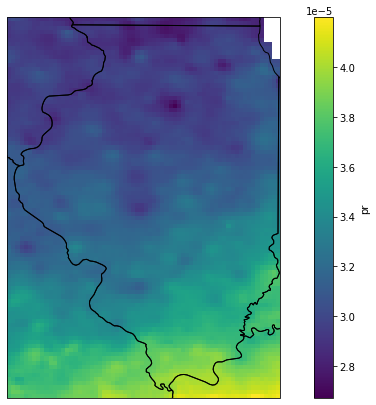

In [10]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
dataset.pr.mean('time').mean('name').plot()
ax.add_feature(cfeature.STATES)

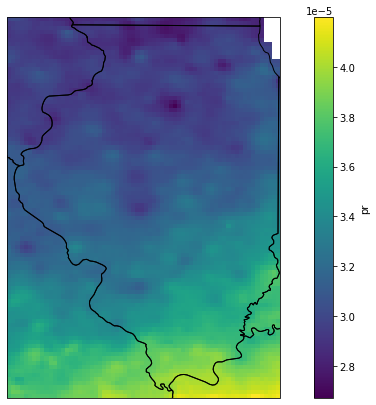

In [19]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
dataset.pr.mean('time').mean('name').plot()
ax.add_feature(cfeature.STATES)

In [20]:
dataset.to_netcdf('/data/keeling/a/cristi/a/downscaled_data/LOCA2/LOCA2_precip_Illinois_ensmean_ssp370_2015-2044.nc')

In [2]:
dataset = xr.open_dataset('/data/keeling/a/cristi/a/downscaled_data/LOCA2/LOCA2_precip_Illinois_ensmean_ssp370_2015-2044.nc')
dataset.load()

<xarray.Dataset>
Dimensions:  (lon: 66, lat: 92, time: 10958, name: 23)
Coordinates:
  * lon      (lon) float64 268.4 268.5 268.5 268.6 ... 272.3 272.3 272.4 272.5
  * lat      (lat) float64 36.91 36.97 37.03 37.09 ... 42.41 42.47 42.53 42.59
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2044-12-31
  * name     (name) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'TaiESM1'
Data variables:
    pr       (name, time, lat, lon) float32 0.0 0.0 1.968e-06 ... nan nan nan

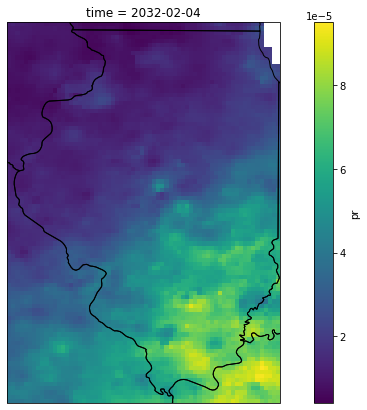

In [3]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
dataset.pr.sel(time='2032-02-04').mean('name').plot()
ax.add_feature(cfeature.STATES)